# Most Highly Paid Programming Languages

Now let's look at the second question of interest.  That is - What were the top paying programming languages over the past 5 years?

In [42]:
# import required libraries

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [43]:
# read in and gather data from csv

df_2019 = pd.read_csv('.\data\stack-overflow-developer-survey-2019\survey_results_public.csv')
df_2020 = pd.read_csv('.\data\stack-overflow-developer-survey-2020\survey_results_public.csv')
df_2021 = pd.read_csv('.\data\stack-overflow-developer-survey-2021\survey_results_public.csv')
df_2022 = pd.read_csv('.\data\stack-overflow-developer-survey-2022\survey_results_public.csv')
df_2023 = pd.read_csv('.\data\stack-overflow-developer-survey-2023\survey_results_public.csv')
df_2020.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [44]:
# data previously assessed to ensure the columns match up or can be amended to match if needed - we can see that 'MainBranch' is the same i.e. if they are a developer or not
# however 'LanguageHaveWorkedWith' is named 'LanguageWorkedWith' in 2020 and 2019

# assessing the data previously to ensure the categorical values match up or can be amended to match if needed - 
# we can saw that 'Bash/Shell (all shells)' needs to be changed to 'Bash/Shell/PowerShell' and
# 'PowerShell' needs to be changed to 'Bash/Shell/PowerShell' plus 'LISP' to 'Lisp'

# create new dataframes where the 'LanguageHaveWorkedWith' column is split into an array of strings instead of a list of languages
df_2023_temp = df_2023
df_2023_temp['LanguageHaveWorkedWith'] = df_2023_temp['LanguageHaveWorkedWith'].str.split(';')
df_2022_temp = df_2022
df_2022_temp['LanguageHaveWorkedWith'] = df_2022_temp['LanguageHaveWorkedWith'].str.split(';')
df_2021_temp = df_2021
df_2021_temp['LanguageHaveWorkedWith'] = df_2021_temp['LanguageHaveWorkedWith'].str.split(';')
df_2020_temp = df_2020
df_2020_temp['LanguageWorkedWith'] = df_2020_temp['LanguageWorkedWith'].str.split(';')
df_2019_temp = df_2019
df_2019_temp['LanguageWorkedWith'] = df_2019_temp['LanguageWorkedWith'].str.split(';')

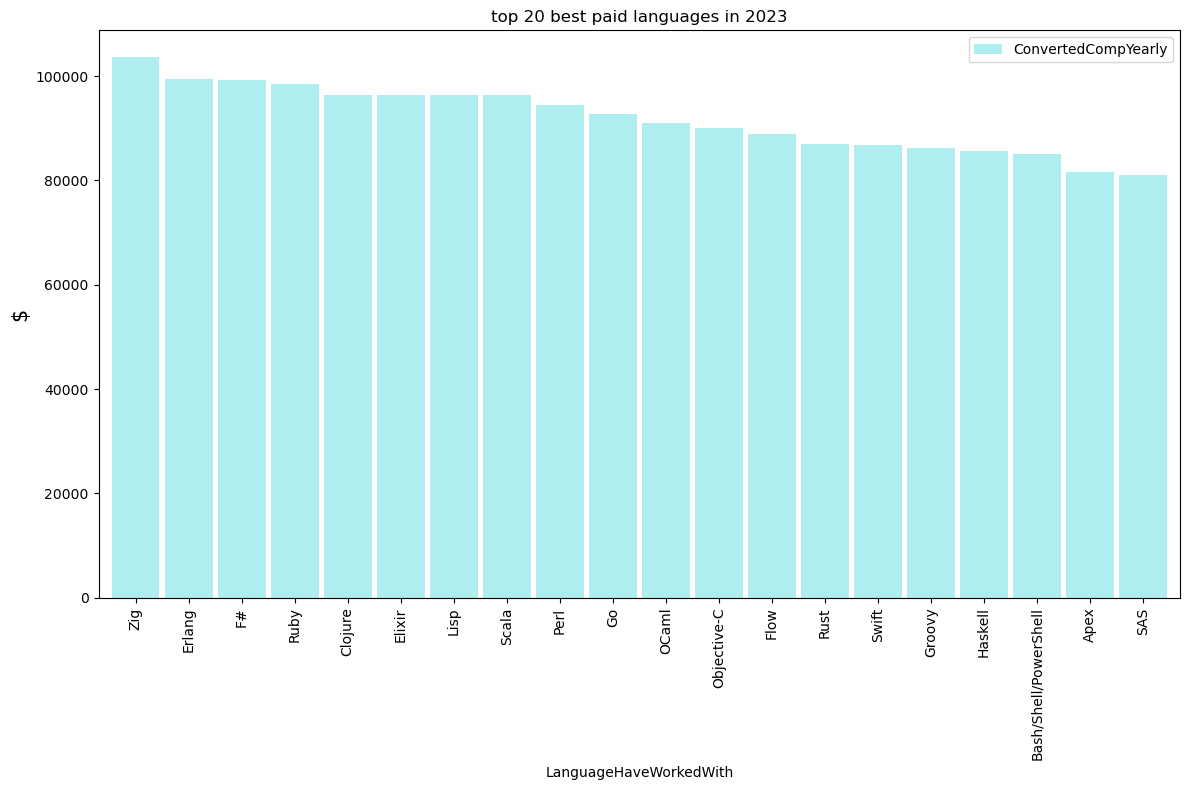

top 5 best paid languages
                        ConvertedCompYearly
LanguageHaveWorkedWith                     
Zig                                103611.0
Erlang                              99492.5
F#                                  99311.0
Ruby                                98522.0
Clojure                             96381.0


In [45]:
# In this case, we want to look at the languages data for each year
# First - let's just look at the top 10 languages people have worked with  and want to work with in 2023

# drop nas split into list and explode into rows
language_count_23 = df_2023_temp[['LanguageHaveWorkedWith', 'ConvertedCompYearly']].dropna(axis=0, how='any').explode('LanguageHaveWorkedWith').replace({'Bash/Shell (all shells)': 'Bash/Shell/PowerShell', 'LISP' : 'Lisp', 'Bash/Shell': 'Bash/Shell/PowerShell', 'PowerShell': 'Bash/Shell/PowerShell'})

#count values
language_count_23 = language_count_23.groupby(['LanguageHaveWorkedWith']).median().reset_index().sort_values(by=['ConvertedCompYearly'], ascending=False).set_index('LanguageHaveWorkedWith')


# bar chart
fig, (ax1) =  plt.subplots(1, sharex=False, sharey= False, figsize=(12,8)) 
(language_count_23[0:20]).plot.bar(color='paleturquoise', width=0.9, ax=ax1);
ax1.set_title("top 20 best paid languages in 2023")

# display plots
plt.ylabel('$', fontsize=15)
plt.tight_layout()
plt.show()

# print exact median compensations
print("top 5 best paid languages")
print(language_count_23[0:5])


Here we can see that the top 5 best paid languages worked with in 2023 were Zig with a median of $103611 per year, Erlang with a median of $99492 per year, F# with a median of $99311 per year, Ruby with a median of $98522 per year and Clojure with a median of $96381 per year, these top paying languages are quite different from the top languages people are working with and the top languages people wanted to work with in 2023. However this is for the overall participants, but we are interested in professional developers, so lets look at those.

top 5 highest paid languages used devs
                        ConvertedCompYearly
LanguageHaveWorkedWith                     
Zig                                105766.0
F#                                 100000.0
Erlang                             100000.0
Ruby                                99156.0
Lisp                                96657.0


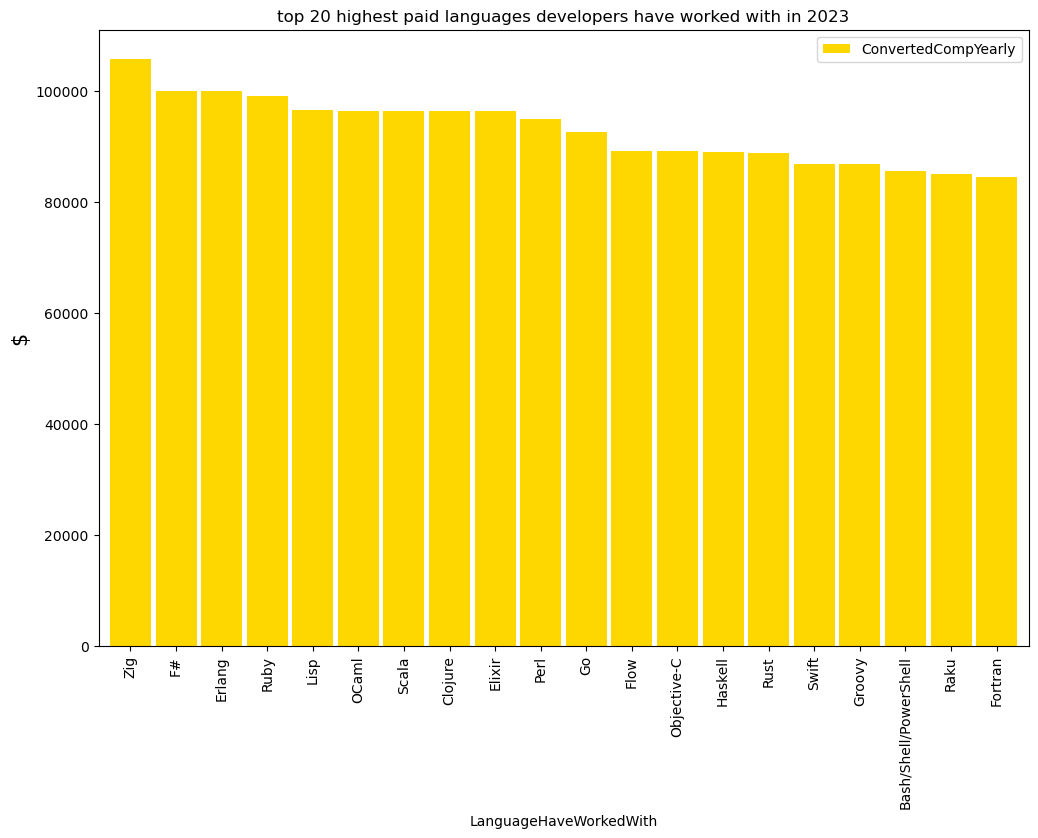

In [46]:
#create developer only dataframe
developers = df_2023_temp.loc[df_2023_temp['MainBranch'] == 'I am a developer by profession']

# drop nas split into list and explode into rows
language_count_dev_23 = developers[['LanguageHaveWorkedWith', 'ConvertedCompYearly']].dropna(axis=0, how='any').explode('LanguageHaveWorkedWith').replace({'Bash/Shell (all shells)': 'Bash/Shell/PowerShell', 'LISP' : 'Lisp', 'Bash/Shell': 'Bash/Shell/PowerShell', 'PowerShell': 'Bash/Shell/PowerShell'})

#count values
language_count_dev_23 = language_count_dev_23.groupby(['LanguageHaveWorkedWith']).median().reset_index().sort_values(by=['ConvertedCompYearly'], ascending=False).set_index('LanguageHaveWorkedWith')


# bar chart
fig, (ax3) =  plt.subplots(1, sharex=False, sharey= False, figsize=(12,8)) 
(language_count_dev_23[0:20]).plot.bar(color='gold', width=0.9, ax=ax3);
ax3.set_title("top 20 highest paid languages developers have worked with in 2023")

# print exact median compensation
plt.ylabel('$', fontsize=15)
print("top 5 highest paid languages used devs")
print(language_count_dev_23[0:5])

Here we can see that the top 5 best paid languages for developers worked with in 2023 were Zig with a median of $105766 per year, F# with a median of $100000 per year tied with Erlang with a median of $100000 per year, Ruby with a median of $99156 per year and Lisp with a median of $96657 per year, again these top paying languages are quite different from the top languages people are working with and the top languages people wanted to work with in 2023. It also looks like Developers are generally paid more on average for these languages and Clojure has moved down and Lisp up for developers.

In order to answer the full question we need to find the median pay for each language over the past 5 years.

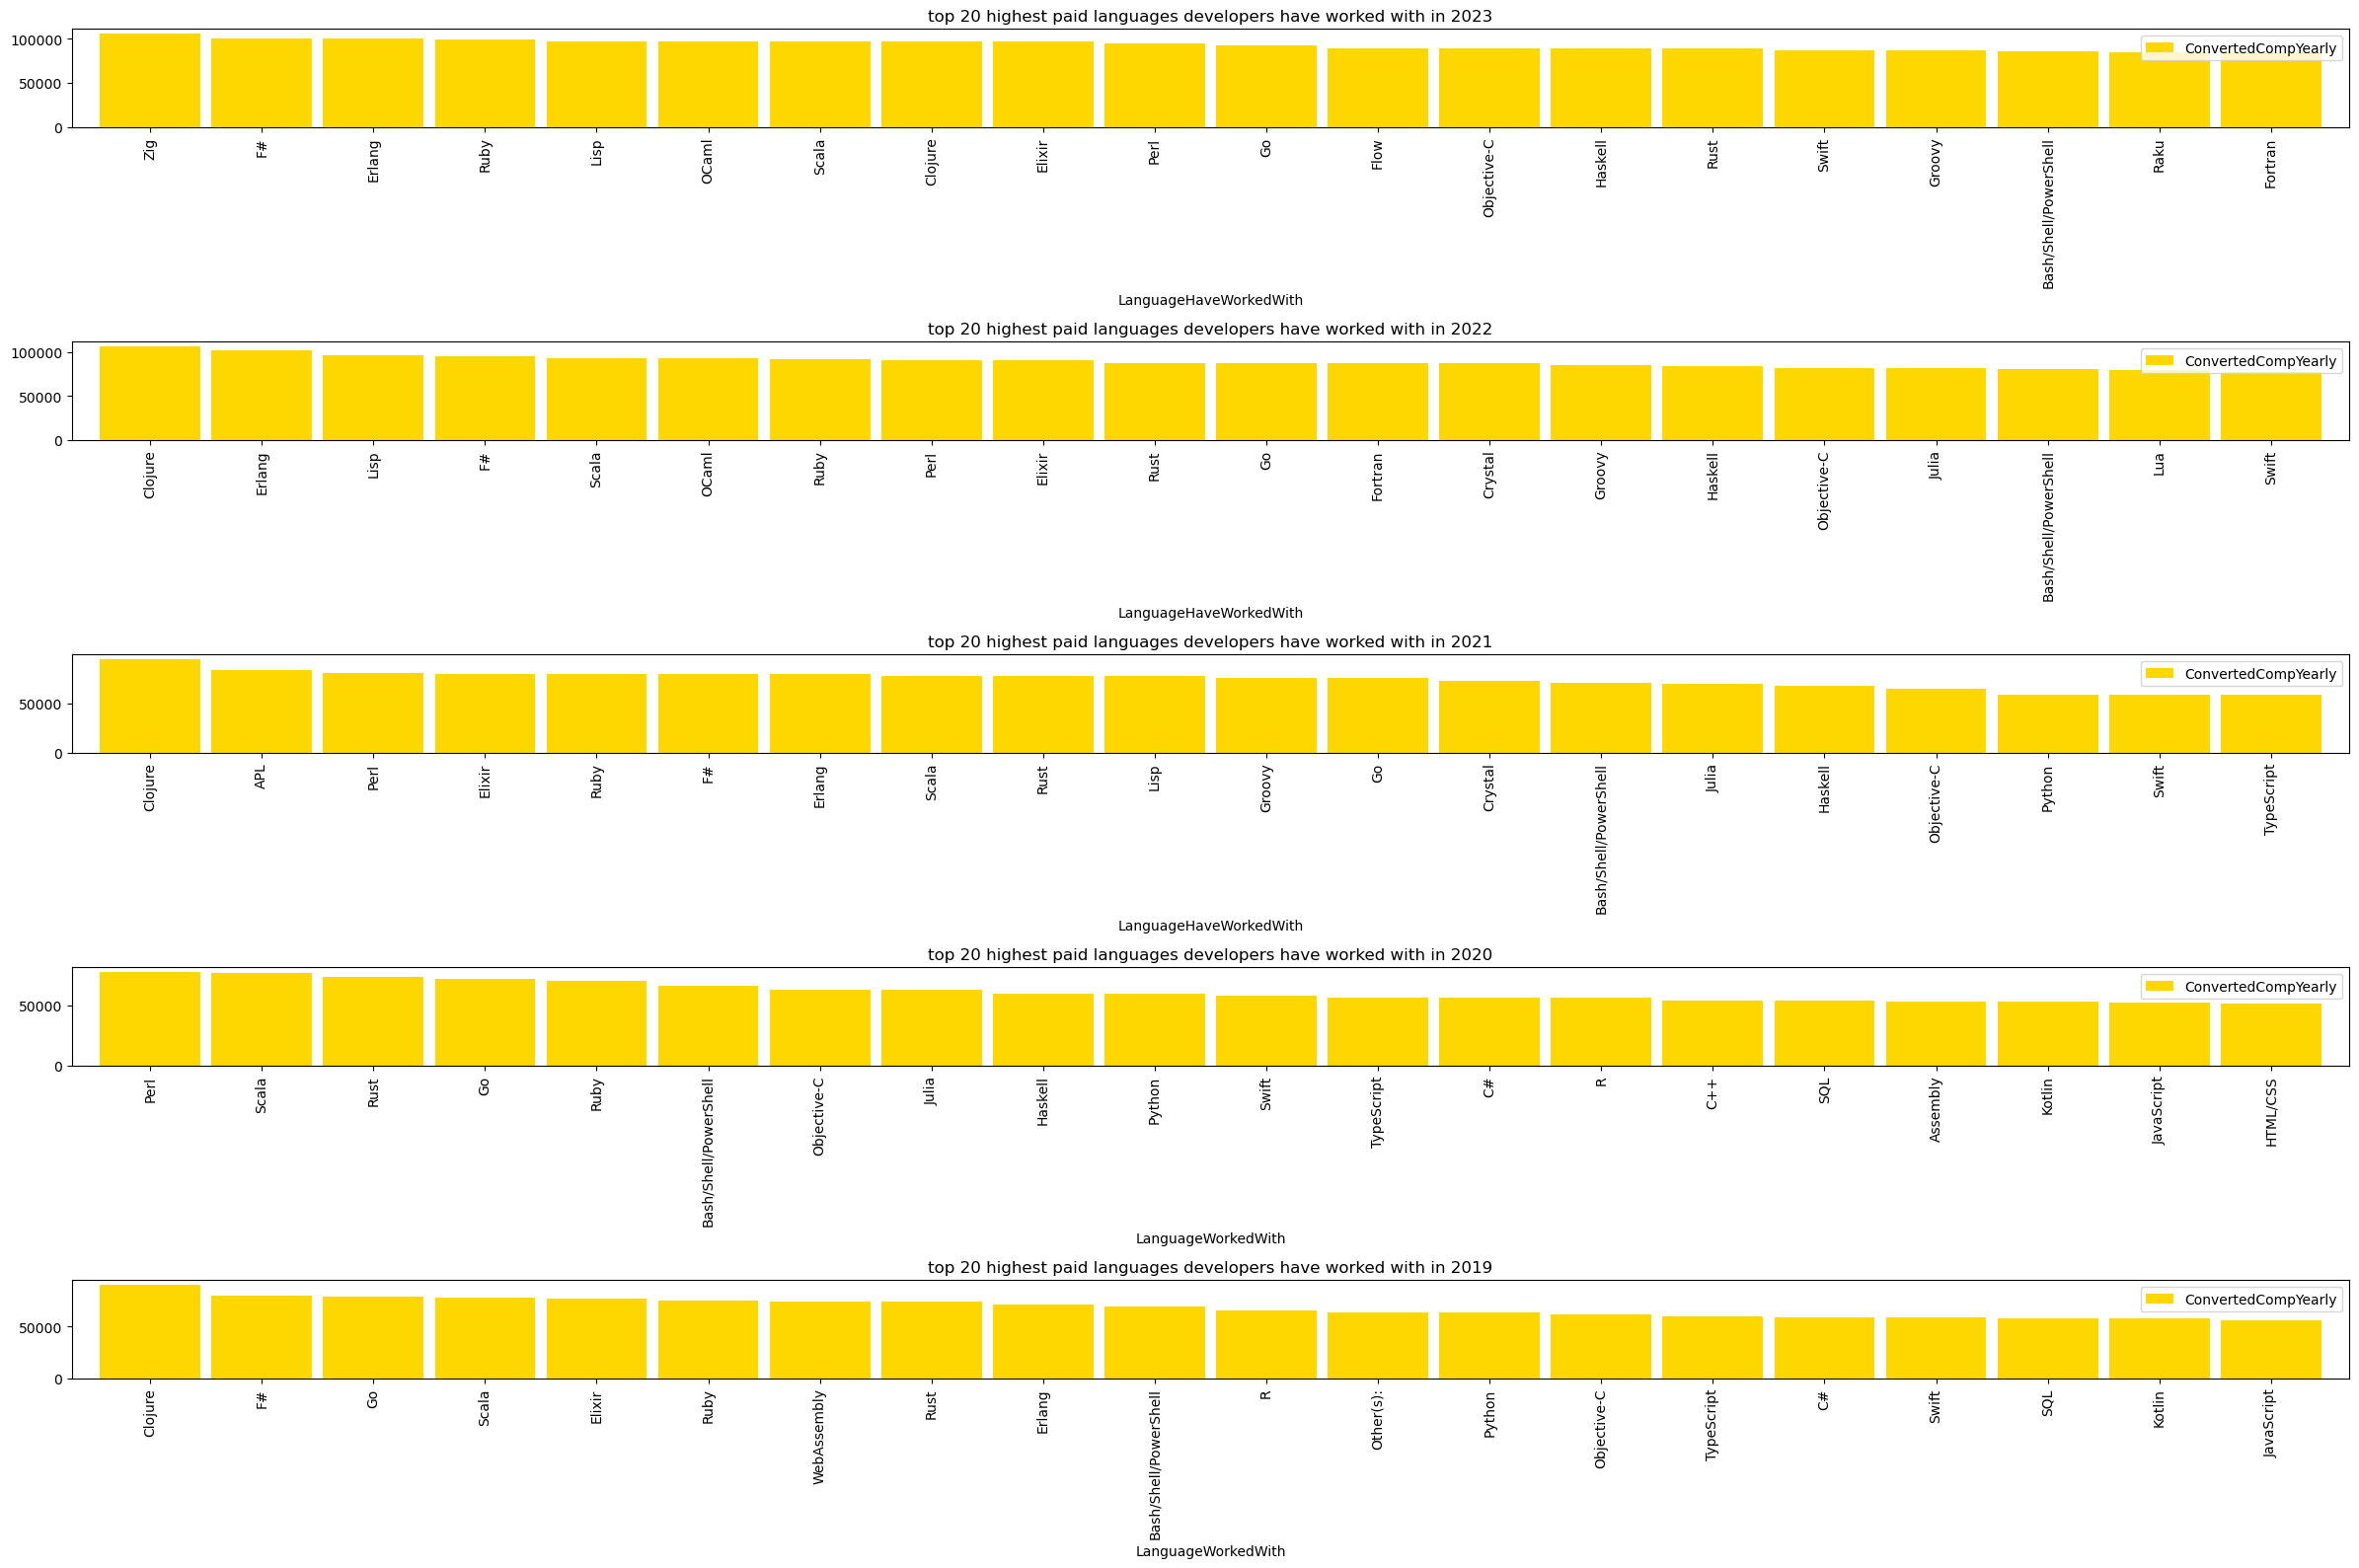

In [47]:

#create developer only dataframes
developers_23 = df_2023_temp.loc[df_2023_temp['MainBranch'] == 'I am a developer by profession']
developers_22 = df_2022_temp.loc[df_2022_temp['MainBranch'] == 'I am a developer by profession']
developers_21 = df_2021_temp.loc[df_2021_temp['MainBranch'] == 'I am a developer by profession']
developers_20 = df_2020_temp.loc[df_2020_temp['MainBranch'] == 'I am a developer by profession']
developers_19 = df_2019_temp.loc[df_2019_temp['MainBranch'] == 'I am a developer by profession']

# drop nas split into list and explode into rows
language_count_dev_23 = developers_23[['LanguageHaveWorkedWith', 'ConvertedCompYearly']].dropna(axis=0, how='any').explode('LanguageHaveWorkedWith').replace({'Bash/Shell (all shells)': 'Bash/Shell/PowerShell', 'LISP' : 'Lisp', 'Bash/Shell': 'Bash/Shell/PowerShell', 'PowerShell': 'Bash/Shell/PowerShell'})
language_count_dev_22 = developers_22[['LanguageHaveWorkedWith', 'ConvertedCompYearly']].dropna(axis=0, how='any').explode('LanguageHaveWorkedWith').replace({'Bash/Shell (all shells)': 'Bash/Shell/PowerShell', 'LISP' : 'Lisp', 'Bash/Shell': 'Bash/Shell/PowerShell', 'PowerShell': 'Bash/Shell/PowerShell'})
language_count_dev_21 = developers_21[['LanguageHaveWorkedWith', 'ConvertedCompYearly']].dropna(axis=0, how='any').explode('LanguageHaveWorkedWith').replace({'Bash/Shell (all shells)': 'Bash/Shell/PowerShell', 'LISP' : 'Lisp', 'Bash/Shell': 'Bash/Shell/PowerShell', 'PowerShell': 'Bash/Shell/PowerShell'})
language_count_dev_20 = developers_20[['LanguageWorkedWith', 'ConvertedComp']].dropna(axis=0, how='any').explode('LanguageWorkedWith').replace({'Bash/Shell (all shells)': 'Bash/Shell/PowerShell', 'LISP' : 'Lisp', 'Bash/Shell': 'Bash/Shell/PowerShell', 'PowerShell': 'Bash/Shell/PowerShell'}).rename(columns={'ConvertedComp': 'ConvertedCompYearly'})
language_count_dev_19 = developers_19[['LanguageWorkedWith', 'ConvertedComp']].dropna(axis=0, how='any').explode('LanguageWorkedWith').replace({'Bash/Shell (all shells)': 'Bash/Shell/PowerShell', 'LISP' : 'Lisp', 'Bash/Shell': 'Bash/Shell/PowerShell', 'PowerShell': 'Bash/Shell/PowerShell'}).rename(columns={'ConvertedComp': 'ConvertedCompYearly'})

#count values
language_count_dev_23 = language_count_dev_23.groupby(['LanguageHaveWorkedWith']).median().reset_index().sort_values(by=['ConvertedCompYearly'], ascending=False).set_index('LanguageHaveWorkedWith')
language_count_dev_22 = language_count_dev_22.groupby(['LanguageHaveWorkedWith']).median().reset_index().sort_values(by=['ConvertedCompYearly'], ascending=False).set_index('LanguageHaveWorkedWith')
language_count_dev_21 = language_count_dev_21.groupby(['LanguageHaveWorkedWith']).median().reset_index().sort_values(by=['ConvertedCompYearly'], ascending=False).set_index('LanguageHaveWorkedWith')
language_count_dev_20 = language_count_dev_20.groupby(['LanguageWorkedWith']).median().reset_index().sort_values(by=['ConvertedCompYearly'], ascending=False).set_index('LanguageWorkedWith')
language_count_dev_19 = language_count_dev_19.groupby(['LanguageWorkedWith']).median().reset_index().sort_values(by=['ConvertedCompYearly'], ascending=False).set_index('LanguageWorkedWith')


# bar chart
fig, (ax5, ax7, ax9, ax11, ax13) =  plt.subplots(5, 1, sharex=False, sharey= False, figsize=(24,16))

# bar chart 1
(language_count_dev_23[0:20]).plot.bar(color='gold', width=0.9, ax=ax5);
ax5.set_title("top 20 highest paid languages developers have worked with in 2023")

# bar chart 3
(language_count_dev_22[0:20]).plot.bar(color='gold', width=0.9, ax=ax7);
ax7.set_title("top 20 highest paid languages developers have worked with in 2022")

# bar chart 5
(language_count_dev_21[0:20]).plot.bar(color='gold', width=0.9, ax=ax9);
ax9.set_title("top 20 highest paid languages developers have worked with in 2021")

# bar chart 7
(language_count_dev_20[0:20]).plot.bar(color='gold', width=0.9, ax=ax11);
ax11.set_title("top 20 highest paid languages developers have worked with in 2020")

# bar chart 9
(language_count_dev_19[0:20]).plot.bar(color='gold', width=0.9, ax=ax13);
ax13.set_title("top 20 highest paid languages developers have worked with in 2019")

# display plots
plt.tight_layout()
plt.show()

As we can see above the popularity of the top paid programming languages change quite frequently, however the bar charts are not the easiest way to observe these fluctuations so lets look at the changes over time as a lineplot.

                          2019     2020     2021      2022      2023
APL                        0.0      0.0  83364.0   71629.5   80092.0
Ada                        0.0      0.0      0.0       0.0   71502.0
Apex                       0.0      0.0      0.0       0.0   80317.0
Assembly               52000.0  53448.0  58368.0   76783.0   78207.0
Bash/Shell/PowerShell  68970.0  66000.0  71093.0   80448.0   85655.0
C                      52248.0  51000.0  54000.0   67550.0   74963.0
C#                     58881.0  56774.0  58368.0   69318.0   74963.0
C++                    54996.0  54049.0  54049.0   69318.0   75000.0
COBOL                      0.0      0.0  50000.0   75592.0       0.0
Clojure                90000.0      0.0  94539.0  106644.0   96381.0
Cobol                      0.0      0.0      0.0       0.0   80000.0
Crystal                    0.0      0.0  72200.0   87352.0   78676.0
Dart                   45830.0  35699.5  32865.0   43061.5   55764.0
Delphi                     0.0    

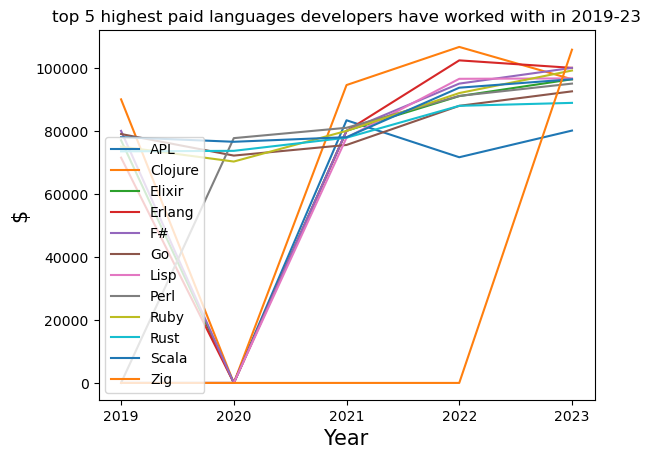

In [48]:

# Creating a dictionary by passing Series objects as values
frame = {'2019': language_count_dev_19.squeeze(),
         '2020': language_count_dev_20.squeeze(),
         '2021': language_count_dev_21.squeeze(),
         '2022': language_count_dev_22.squeeze(),
         '2023': language_count_dev_23.squeeze()}
 
# Creating DataFrame by passing Dictionary
result = pd.DataFrame(frame).fillna(0)

# check dictionary is as expected
print(result)

# plot the top 5 languages for the last 5 years
for i, row in enumerate(result.index):
    #top 5 languages
    if (row in ["Clojure", "Ruby", "F#", "Go", "Scala", "Elixir", "Perl", "Rust", "APL", "Erlang", "Lisp", "Zig"]):
        plt.plot(result.columns, result.iloc[i], label=row)


plt.xlabel('Year', fontsize=15)
plt.ylabel('$', fontsize=15)
plt.legend(loc="lower left")
plt.title('top 5 highest paid languages developers have worked with in 2019-23')

plt.show()

So it looks like the top paid programming / scripting languages change dramatically each year with new ones appearing and shooting up in value immediately making it very difficult to predict which ones are going to the best paid next year. However it may still be possible to predict the average pay for a language given the pay, percentage used and percentage want to use from previous years.